# I'm Moving to Gadfly

So far in this blog, all my plots have either used PyPlot or the experimental GLVisualize, BUT NO LONGER. 

While I've been writing up my research notes, I've been trying to improve my PyPlot graphs. I was trying to get them to look nicer; PyPlot was saying no.  My old buddy since my good old python days and I had a falling out over background colors and resoltion, and now I have decided to move on to a  plotting partner more willing to cope with my demands.  

When I first started learning Julia, Gadfly seemed too unfamiliar, and control actually too hard to come by, so I didn't give it much thought.  

In [1]:
#Pkg.update()
using Gadfly
Pkg.add("Compose")
using Compose

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Compose
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
x=collect(1:.4:10);
y1=sin(x);
y2=cos(x);

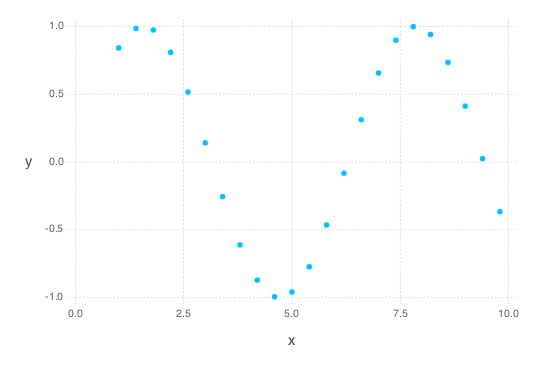

In [3]:
# A simple plot
plot(x=x,y=y1)

But that's just one set of points...
How do we plot more than one set of data?  That's where layers come in.  Instead of using plot, we use layer, and set it as a variable.  We can then `plot` those layers.  

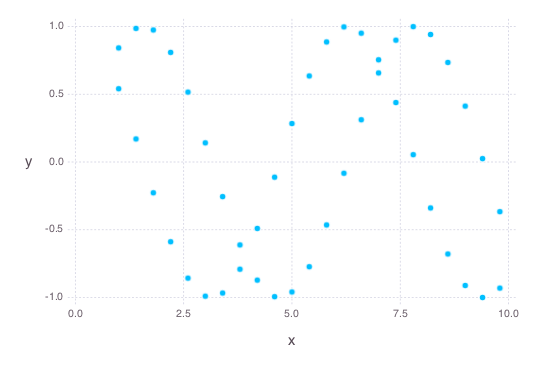

In [5]:
p1=layer(x=x,y=y1,Geom.point)
p2=layer(x=x,y=y2,Geom.point)
plot(p1,p2)

Now what if we want something other than lines plotted?  
Gadfly allows a wide variety of other ways to plot our data.  We control this with the `Geom` (Geometry) specification.  

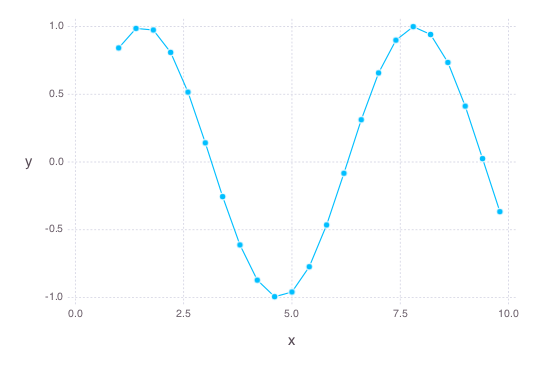

In [6]:
plot(x=x,y=y1,Geom.point,Geom.line)

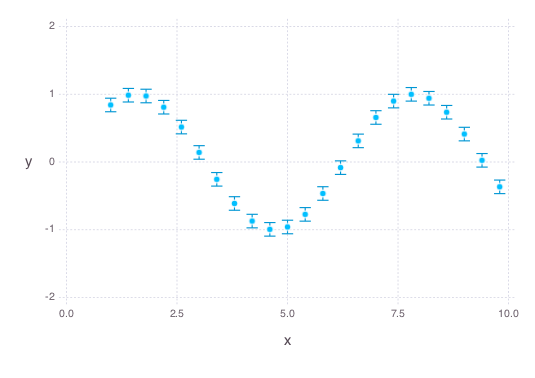

In [7]:
plot(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.point,Geom.errorbar)

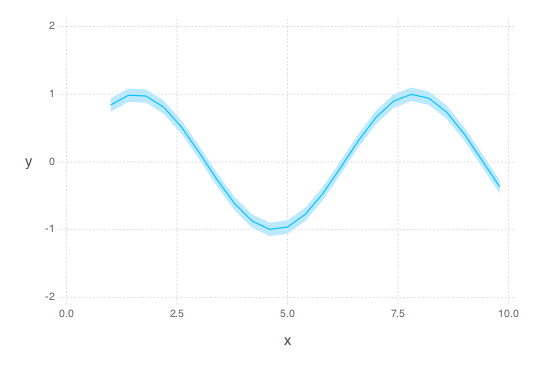

In [11]:
plot(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.line,Geom.ribbon)

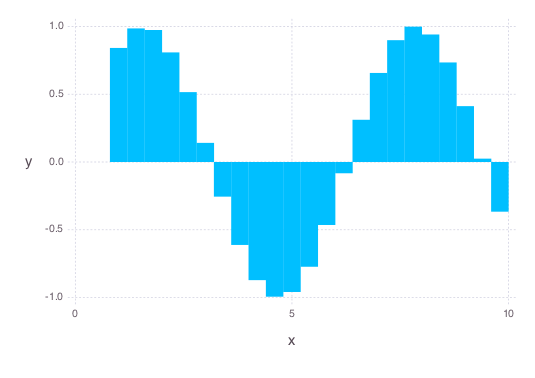

In [8]:
plot(x=x,y=y1,Geom.bar)

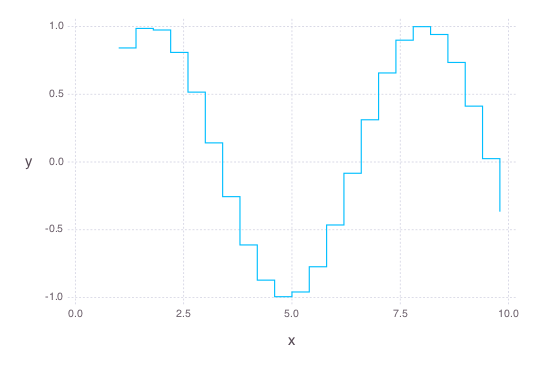

In [10]:
plot(x=x,y=y1,Geom.step)

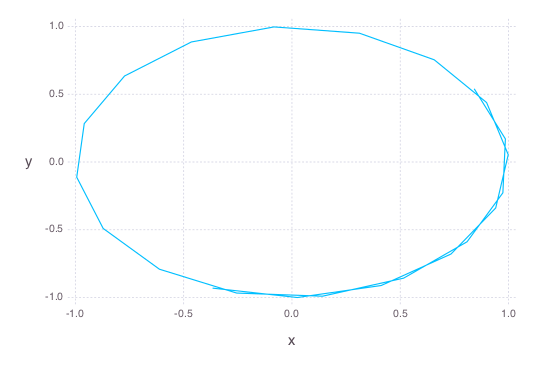

In [17]:
plot(x=y1,y=y2,Geom.path())

## Guide: Labeling Axes
Where `Geom` alters how we plot, `Guide` alters the labeling.  
`Guide` ties in with `Compose.jl` throught the `Guide.annotate` command, but that will take a tutorial in itself.  

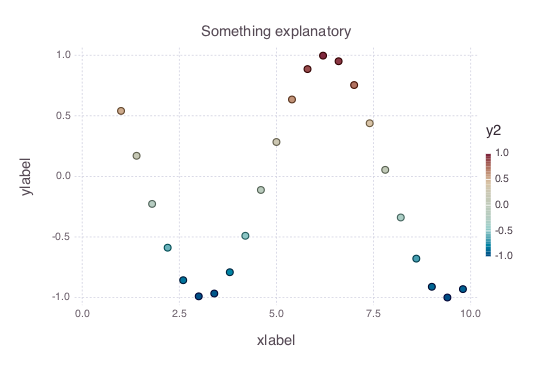

In [54]:
plot(x=x,y=y2,color=y2,
Guide.xlabel("xlabel"),Guide.ylabel("ylabel"),Guide.title("Something explanatory"),
Guide.colorkey("y2"))

Here's something we can do with a combination of `Guide` and `Scale`.  Using `Guide`, we can set where we specifically want our xticks to be, namely at multiples of $\pi$. But then, the labeling would write out some amount of our irrational number, making the plot look horrible.  So we create a function that takes in a number and outputs a string label for `Scale` to use.  

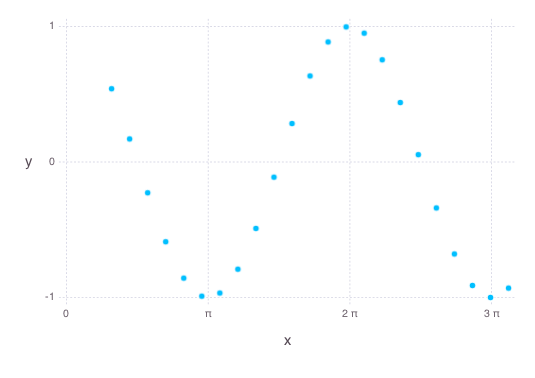

In [57]:
function labelname(x::Real)
    n=round(Int,x/π)
    if n==0
        return "0"
    elseif n==1
        return "π"
    else
        return("$n π")
    end
    return("$n π")
end

xticks=[0,π,2π,3π]
yticks=[-1,0,1]

plot(x=x,y=y2,
Guide.yticks(ticks=yticks),
Guide.xticks(ticks=xticks),Scale.x_continuous(labels=labelname))


# Themes
I mostly chose Gadfly because of the control I could have with the `Theme` command.  http://dcjones.github.io/Gadfly.jl/themes.html has a much more exhaustive list than what I will be demonstrating with here.  

In [23]:
# Solarized Colors that I like working with
# http://ethanschoonover.com/solarized
using Colors
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");

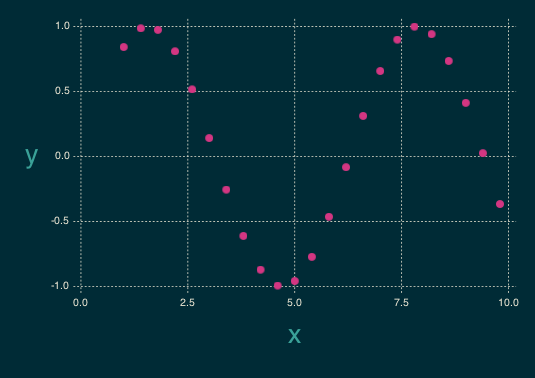

In [36]:
plot(x=x,y=y1,
    Theme(highlight_width=0pt, #lose the white ring around the points
    default_point_size=3pt,
    default_color=magenta,
    background_color=base03, 
    grid_color=base2,
    minor_label_color=base2,
    key_label_color=base2,
    key_title_color=cyan,
    major_label_color=cyan,
    major_label_font_size=20pt,
panel_opacity=1
);)

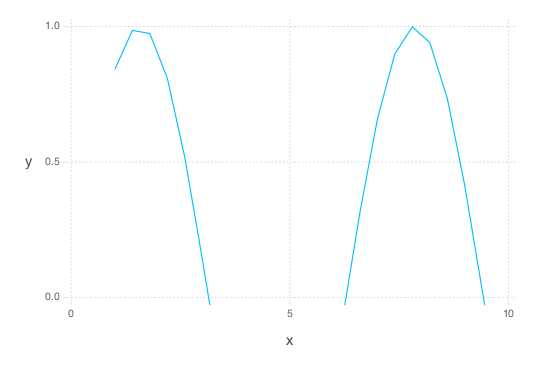

In [39]:
plot(x=x,y=y1,Geom.line,Coord.Cartesian(ymin=0,ymax=1,xmin=0,xmax=10))

So we covered seperately `Guide`, `Themes`, and partially `Coord` and `Scale`. Individually, it doesn't get to bad to add them in, but if we started to add everything in to make our finished plot, then the plot function would start to get quite hefty.  

Luckily, just like layers for data points, we can put our modifiers into variables.  Then we can just include the variables into our plot function.  

This also helps for when we want to use one theme for a series of graphs.  We can define the theme variable up top, and then just include it in every graph there after, never having to declare it again.  

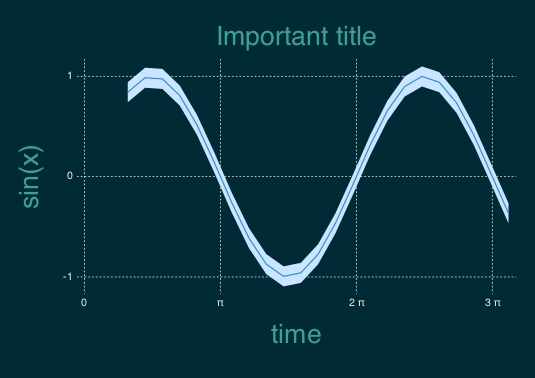

In [66]:
function labelname(x::Real)
    n=round(Int,x/π)
    if n==0
        return "0"
    elseif n==1
        return "π"
    else
        return("$n π")
    end
    return("$n π")
end

xticks=[0,π,2π,3π]
yticks=[-1,0,1]

data=layer(x=x,y=y1,ymin=y1-.1,ymax=y1+.1,Geom.line,Geom.ribbon)

yt=Guide.yticks(ticks=yticks)
xt=Guide.xticks(ticks=xticks)
xs=Scale.x_continuous(labels=labelname)

t= Theme(highlight_width=0pt, #lose the white ring around the points
    default_point_size=3pt,
    default_color=blue,
    background_color=base03, 
    grid_color=base2,
    minor_label_color=base2,
    key_label_color=base2,
    key_title_color=cyan,
    major_label_color=cyan,
    major_label_font_size=20pt,
    panel_opacity=1)

xl=Guide.xlabel("time")
yl=Guide.ylabel("sin(x)")
GT=Guide.title("Important title")

plot(data,yt,xt,xs,t,xl,yl,GT)

So yes, we are still having to include quite a few variables there in the plot, but that line just ties together everything you wrote above.   